In [1]:
#instal vader Sentiment package
!pip install vaderSentiment

In [2]:
#instal the NRC lexicon package
!pip install nltk NRCLex textblob --quiet


In [3]:
#upgrade the NRC lexicon package
!pip install nrclex --upgrade

  Using cached NRCLex-4.0-py3-none-any.whl (4.4 kB)


In [4]:
import nltk

# Download essential NLP datasets
nltk.download('punkt')  # Tokenizer
nltk.download('wordnet')  # WordNet lexicon
nltk.download('averaged_perceptron_tagger')  # POS tagging
nltk.download('stopwords')  # Common stopwords
nltk.download('brown')  # General language corpus
nltk.download('vader_lexicon')  # Sentiment lexicon
nltk.download('opinion_lexicon')  # Opinion lexicon
nltk.download('punkt_tab')

C:\Users\naylo\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naylo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naylo\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\naylo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naylo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\naylo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping 

True

In [6]:
#test

from nrclex import NRCLex

text = "This movie is amazing and makes me happy"
sentiment = NRCLex(text)

# Print emotion scores
print(sentiment.raw_emotion_scores)
print(sentiment.affect_frequencies)


{'anticipation': 1, 'joy': 1, 'positive': 1, 'trust': 1}
{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.25, 'surprise': 0.0, 'positive': 0.25, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.25, 'anticipation': 0.25}


In [7]:
#download the necessary library packages

import re
import pandas as pd
import numpy as np
from collections import defaultdict

pd.set_option('display.max_rows', 500)

from nltk import tokenize

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange

In [11]:
#set strings to the texts from each episode
#get episode text files from google drive
episode1 = 'SW_01.txt'
episode2 = 'SW_07.txt'
episode3 = 'SW_03.txt'
episode4 = 'SW_04.txt'
episode5 = 'SW_05.txt'
episode6 = 'SW_06.txt'
episode7 = 'SW_07.txt'
#make each trilogy dictionary contain the 3 scripts from the episodes
prequels = (episode1, episode2, episode3)
original = (episode4, episode5, episode6)
sequels = (episode7)

In [12]:
#create function to clean scripts
import string
import re

def clean_text1(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\n+', ' ', text)  # Replace multiple newlines with a space
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation (except spaces)
    text = re.sub(r'\b(?:int|ext|cut|to|cont|continued|fade)\b', '', text)  # Remove screenplay markers
    return text.strip()

In [13]:

#read the episode text for episode 1
episode1_text = []
with open(episode1, 'r', encoding='latin-1') as file:
    episode1_text.append(file.read())

#use the sentiment vader to get the sentimental scores
episode1_score = analyzer.polarity_scores(episode1_text)

#read the raw episode again
with open(episode1, "r", encoding="utf-8") as file:
    episode1_raw = file.read()

#use clean function on episode 1
episode1_clean = clean_text1(episode1_raw)

#use NRC lex to get the scripts emotional scores
episode1_NRC = NRCLex(episode1_clean)

#episode2
#read the episode text for episode 2
episode2_text = []
with open(episode2, 'r', encoding='latin-1') as file:
    episode2_text.append(file.read())

#use the sentiment vader to get the sentimental scores
episode2_score = analyzer.polarity_scores(episode2_text)
#read the raw episode again
with open(episode2, "r", encoding="latin-1") as file:
    episode2_raw = file.read()
#use clean function on episode 2
episode2_clean = clean_text1(episode2_raw)
#use NRC lex to get the scripts emotional scores
episode2_NRC = NRCLex(episode2_clean)

#episode3
#read the episode text for episode 3
episode3_text = []
with open(episode3, 'r', encoding='latin-1') as file:
    episode3_text.append(file.read())
#use the sentiment vader to get the sentimental scores
episode3_score = analyzer.polarity_scores(episode3_text)
#read the raw episode again
with open(episode3, "r", encoding="latin-1") as file:
    episode3_raw = file.read()
#use clean function on episode 3
episode3_clean = clean_text1(episode3_raw)
#use NRC lex to get the scripts emotional scores
episode3_NRC = NRCLex(episode3_clean)

In [14]:
#print the vader scores for the first trilogy
print(episode1_score)
print(episode2_score)
print(episode3_score)

{'neg': 0.086, 'neu': 0.825, 'pos': 0.089, 'compound': 0.9997}
{'neg': 0.12, 'neu': 0.797, 'pos': 0.082, 'compound': -1.0}
{'neg': 0.123, 'neu': 0.783, 'pos': 0.095, 'compound': -1.0}


In [15]:
#print the raw emotional scores (count) for the first trilogy
print(episode1_NRC.raw_emotion_scores)
print(episode2_NRC.raw_emotion_scores)
print(episode3_NRC.raw_emotion_scores)

{'anticipation': 614, 'joy': 363, 'positive': 1142, 'trust': 730, 'fear': 602, 'negative': 1014, 'anger': 461, 'sadness': 346, 'disgust': 313, 'surprise': 329}
{'anticipation': 486, 'joy': 302, 'positive': 868, 'trust': 702, 'anger': 604, 'fear': 738, 'negative': 1051, 'sadness': 441, 'surprise': 335, 'disgust': 265}
{'anticipation': 668, 'joy': 358, 'positive': 1385, 'trust': 1052, 'anger': 737, 'fear': 953, 'negative': 1370, 'surprise': 345, 'sadness': 510, 'disgust': 342}


In [ ]:
#print the frequency of the emotions for the first trilogy
print(episode1_NRC.affect_frequencies)
print(episode2_NRC.affect_frequencies)
print(episode3_NRC.affect_frequencies)


{'fear': 0.10179235711870138, 'anger': 0.0779506256340886, 'anticip': 0.0, 'trust': 0.12343591477849171, 'surprise': 0.055630706797429826, 'positive': 0.19310111599594185, 'negative': 0.1714575583361515, 'sadness': 0.05850524179912073, 'disgust': 0.052925262089956036, 'joy': 0.061379776800811636, 'anticipation': 0.10382144064930673}
{'fear': 0.10875608061153579, 'anger': 0.06323835997220292, 'anticip': 0.0, 'trust': 0.1250868658790827, 'surprise': 0.05211952744961779, 'positive': 0.20674079221681724, 'negative': 0.15705350938151494, 'sadness': 0.07366226546212648, 'disgust': 0.03509381514940931, 'joy': 0.07522585128561501, 'anticipation': 0.10302293259207783}
{'fear': 0.12344559585492228, 'anger': 0.09546632124352332, 'anticip': 0.0, 'trust': 0.13626943005181347, 'surprise': 0.044689119170984455, 'positive': 0.1794041450777202, 'negative': 0.17746113989637305, 'sadness': 0.06606217616580311, 'disgust': 0.04430051813471503, 'joy': 0.046373056994818654, 'anticipation': 0.0865284974093264

In [ ]:
#create a new dictionary of the emotions and remove the positive and negative emotions
#use the max feature to see the emotion most frequent in the episodes
filtered_emotions_episode1 = {k: v for k, v in episode1_NRC.affect_frequencies.items() if k not in ["positive", "negative"]}
max_emotion_episode1 = max(filtered_emotions_episode1, key=filtered_emotions_episode1.get)
filtered_emotions_episode2 = {k: v for k, v in episode2_NRC.affect_frequencies.items() if k not in ["positive", "negative"]}
max_emotion_episode2 = max(filtered_emotions_episode2, key=filtered_emotions_episode2.get)
filtered_emotions_episode3 = {k: v for k, v in episode3_NRC.affect_frequencies.items() if k not in ["positive", "negative"]}
max_emotion_episode3 = max(filtered_emotions_episode3, key=filtered_emotions_episode3.get)

#print the max emotion
print(max_emotion_episode1)
print(max_emotion_episode2)
print(max_emotion_episode3)


trust
trust
trust


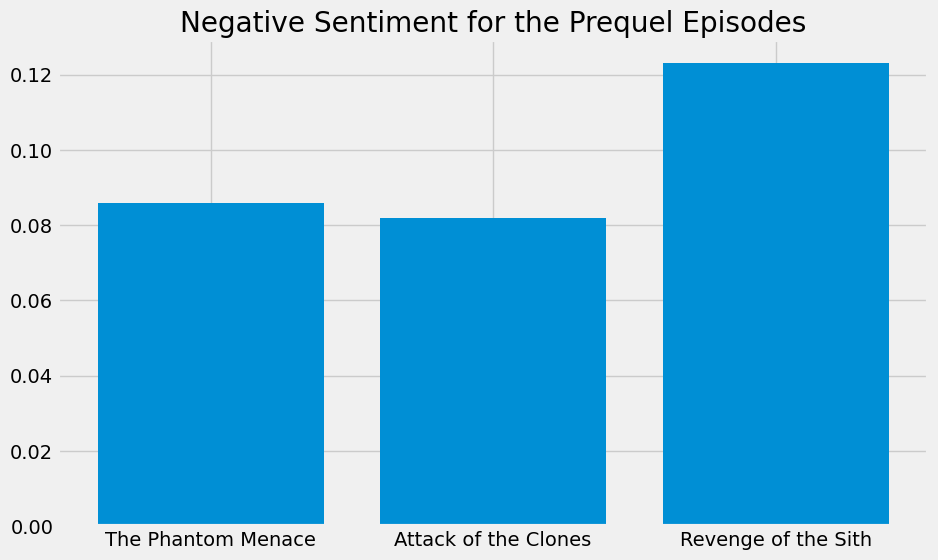

In [ ]:
#create a bar chart to visualize the negative sentiment of the prequel
plt.figure(figsize=(10, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith']
plt.bar(xlabels, [episode1_score['neg'], episode2_score['neg'], episode3_score['neg']]) #create labels
plt.title('Negative Sentiment for the Prequel Episodes') #create a title
plt.savefig("prequel-neg-vader.pdf")
plt.show()

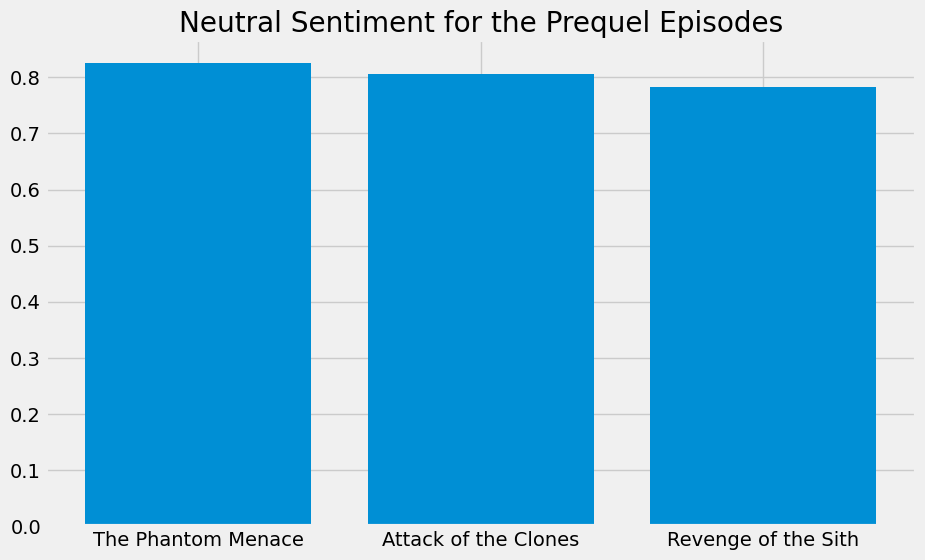

In [ ]:
#create a bar chart to visualize the neutral sentiment of the prequel
plt.figure(figsize=(10, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith']
plt.bar(xlabels, [episode1_score['neu'], episode2_score['neu'], episode3_score['neu']]) #labels
plt.title('Neutral Sentiment for the Prequel Episodes') #title
plt.savefig("prequel-neu-vader.pdf")
plt.show()

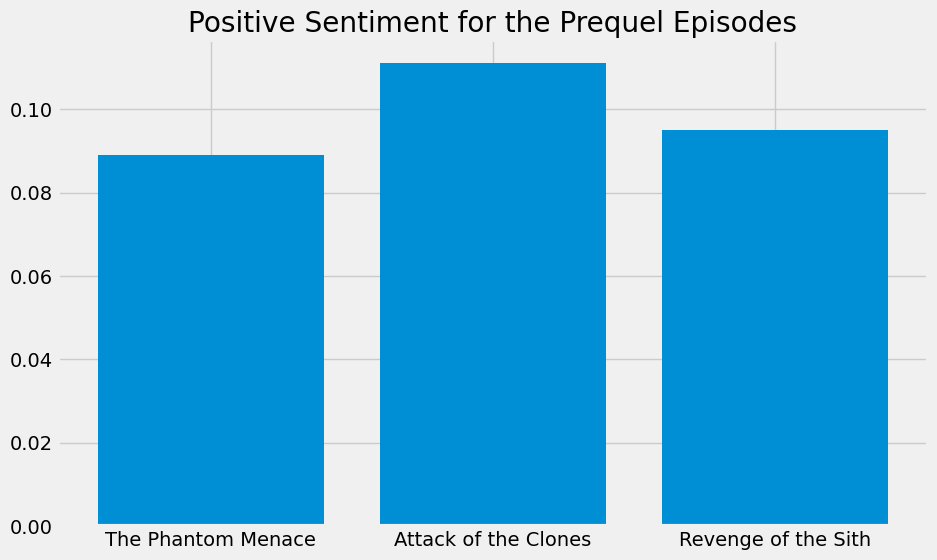

In [ ]:
#create a bar chart to visualize the positive sentiment of the prequel
plt.figure(figsize=(10, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith']
plt.bar(xlabels, [episode1_score['pos'], episode2_score['pos'], episode3_score['pos']]) #labels
plt.title('Positive Sentiment for the Prequel Episodes') #title
plt.savefig("prequel-pos-vader.pdf")
plt.show()

In [ ]:
#trilogy2
#episode4

#read the episode text for episode 4
episode4_text = []
with open(episode4, 'r', encoding='latin-1') as file:
    episode4_text.append(file.read())
#use the sentiment vader to get the sentimental scores
episode4_score = analyzer.polarity_scores(episode4_text)
#read the raw episode again
with open(episode4, "r", encoding="utf-8") as file:
    episode4_raw = file.read()
#use clean function on episode 4
episode4_clean = clean_text1(episode4_raw)
#use NRC lex to get the scripts emotional scores
episode4_NRC = NRCLex(episode4_clean)

#episode5
#read the episode text for episode 5
episode5_text = []
with open(episode5, 'r', encoding='latin-1') as file:
    episode5_text.append(file.read())
#use the sentiment vader to get the sentimental scores
episode5_score = analyzer.polarity_scores(episode5_text)
#read the raw episode again
with open(episode5, "r", encoding="latin-1") as file:
    episode5_raw = file.read()
#use clean function on episode 5
episode5_clean = clean_text1(episode5_raw)
#use NRC lex to get the scripts emotional scores
episode5_NRC = NRCLex(episode5_clean)

#episode6
#read the episode text for episode 6
episode6_text = []
with open(episode6, 'r', encoding='latin-1') as file:
    episode6_text.append(file.read())
#use the sentiment vader to get the sentimental scores
episode6_score = analyzer.polarity_scores(episode6_text)
#read the raw episode again
with open(episode6, "r", encoding="latin-1") as file:
    episode6_raw = file.read()
#use clean function on episode 6
episode6_clean = clean_text1(episode6_raw)
#use NRC lex to get the scripts emotional scores
episode6_NRC = NRCLex(episode6_clean)


In [ ]:
#print the vader scores for the second trilogy
print(episode4_score)
print(episode5_score)
print(episode6_score)

{'neg': 0.131, 'neu': 0.787, 'pos': 0.081, 'compound': -1.0}
{'neg': 0.108, 'neu': 0.799, 'pos': 0.093, 'compound': -0.9999}
{'neg': 0.122, 'neu': 0.777, 'pos': 0.101, 'compound': -1.0}


In [ ]:
#print the raw emotional scores (count) for the secound trilogy
print(episode4_NRC.raw_emotion_scores)
print(episode5_NRC.raw_emotion_scores)
print(episode6_NRC.raw_emotion_scores)

{'anticipation': 1095, 'joy': 560, 'positive': 1624, 'trust': 1035, 'surprise': 564, 'fear': 1169, 'negative': 1546, 'anger': 884, 'disgust': 602, 'sadness': 696}
{'anticipation': 663, 'joy': 357, 'positive': 1169, 'trust': 815, 'anger': 593, 'fear': 825, 'negative': 1200, 'surprise': 317, 'disgust': 372, 'sadness': 401}
{'anticipation': 691, 'joy': 485, 'positive': 1232, 'trust': 790, 'negative': 1111, 'surprise': 406, 'fear': 871, 'anger': 651, 'disgust': 340, 'sadness': 457}


In [ ]:
#print the frequency of the emotions for the secound trilogy
print(episode4_NRC.affect_frequencies)
print(episode5_NRC.affect_frequencies)
print(episode6_NRC.affect_frequencies)

{'fear': 0.11959079283887468, 'anger': 0.09043478260869565, 'anticip': 0.0, 'trust': 0.10588235294117647, 'surprise': 0.057698209718670075, 'positive': 0.1661381074168798, 'negative': 0.15815856777493606, 'sadness': 0.07120204603580563, 'disgust': 0.061585677749360614, 'joy': 0.05728900255754476, 'anticipation': 0.11202046035805627}
{'fear': 0.12291418355184744, 'anger': 0.0883492252681764, 'anticip': 0.0, 'trust': 0.1214243146603099, 'surprise': 0.047228843861740165, 'positive': 0.17416567342073896, 'negative': 0.17878426698450536, 'sadness': 0.059743742550655544, 'disgust': 0.05542312276519666, 'joy': 0.053188319427890346, 'anticipation': 0.09877830750893922}
{'fear': 0.1238271253909582, 'anger': 0.09255046914984362, 'anticip': 0.0, 'trust': 0.11231162922945692, 'surprise': 0.05771964742678419, 'positive': 0.17514927495024168, 'negative': 0.15794711401762865, 'sadness': 0.06497014500995166, 'disgust': 0.048336650554449814, 'joy': 0.06895081034972989, 'anticipation': 0.098237133920955

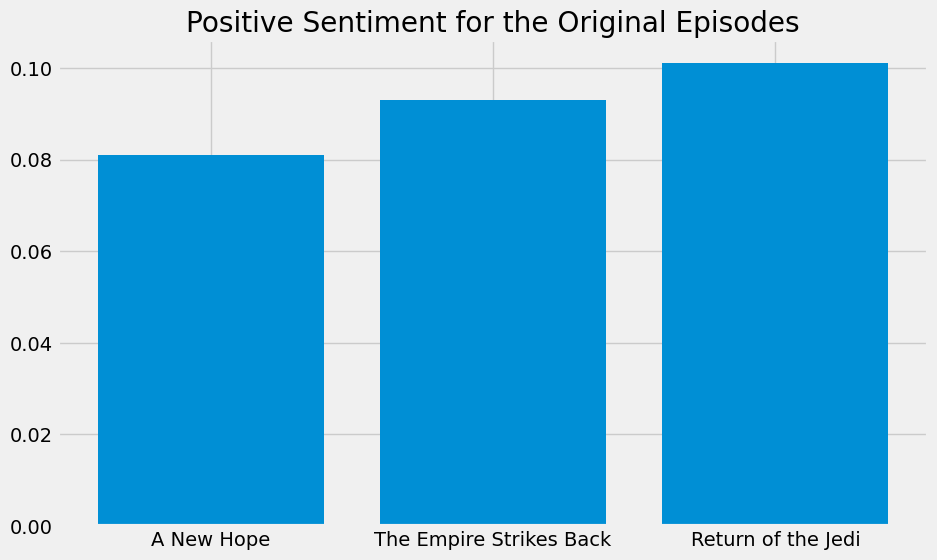

In [ ]:
#create a bar chart to visualize the positive sentiment of the prequel
plt.figure(figsize=(10, 6))
xlabels = ['A New Hope', 'The Empire Strikes Back', 'Return of the Jedi']
plt.bar(xlabels, [episode4_score['pos'], episode5_score['pos'], episode6_score['pos']]) #labels
plt.title('Positive Sentiment for the Original Episodes') #title
plt.savefig("original-pos-vader.pdf")
plt.show()

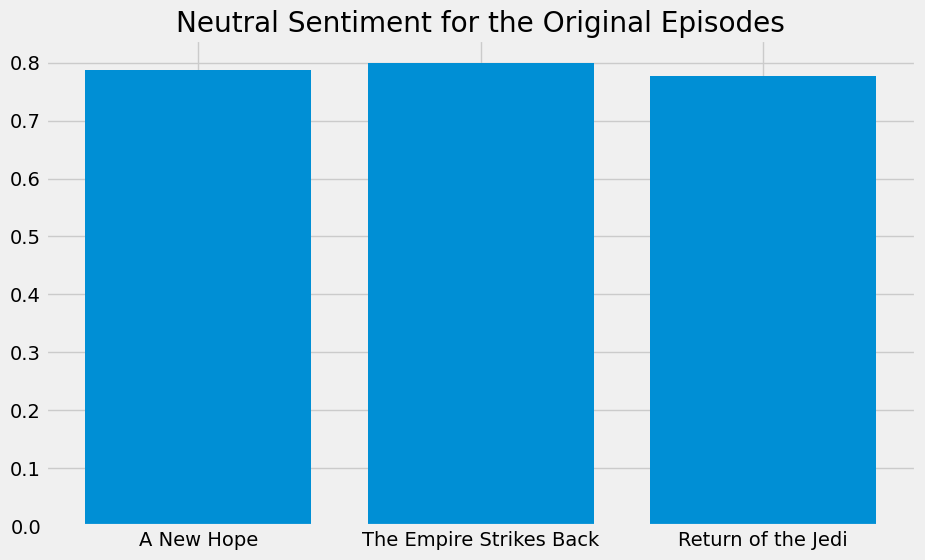

In [ ]:
#create a bar chart to visualize the positive sentiment of the prequel
plt.figure(figsize=(10, 6))
xlabels = ['A New Hope', 'The Empire Strikes Back', 'Return of the Jedi']
plt.bar(xlabels, [episode4_score['neu'], episode5_score['neu'], episode6_score['neu']]) #labels
plt.title('Neutral Sentiment for the Original Episodes') #title
plt.savefig("original-neu-vader.pdf")
plt.show()

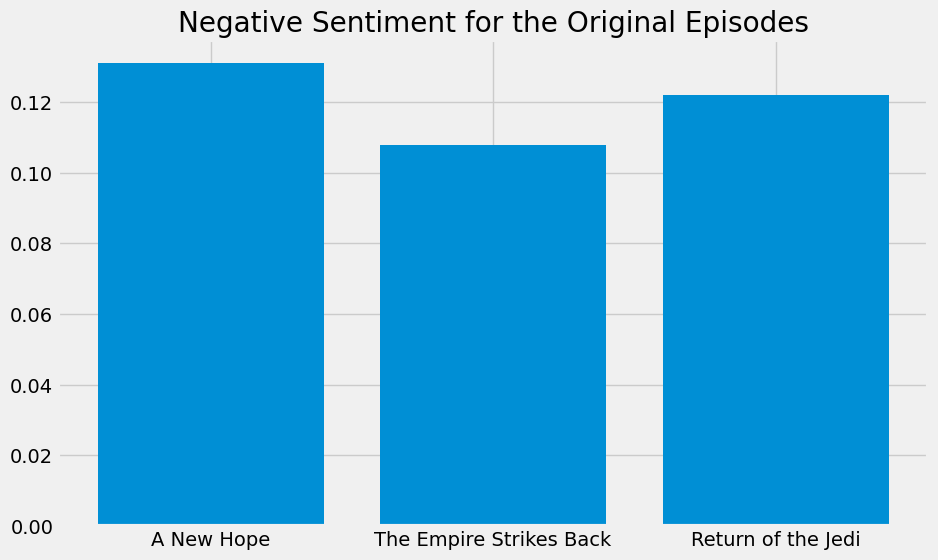

In [ ]:
#create a bar chart to visualize the positive sentiment of the prequel
plt.figure(figsize=(10, 6))
xlabels = ['A New Hope', 'The Empire Strikes Back', 'Return of the Jedi']
plt.bar(xlabels, [episode4_score['neg'], episode5_score['neg'], episode6_score['neg']]) #labels
plt.title('Negative Sentiment for the Original Episodes') #title
plt.savefig("original-neg-vader.pdf")
plt.show()

In [ ]:
#create a new dictionary of the emotions and remove the positive and negative emotions
#use the max feature to see the emotion most frequent in the episodes
filtered_emotions_episode4 = {k: v for k, v in episode4_NRC.affect_frequencies.items() if k not in ["positive", "negative"]}
max_emotion_episode4 = max(filtered_emotions_episode4, key=filtered_emotions_episode4.get)
filtered_emotions_episode5 = {k: v for k, v in episode5_NRC.affect_frequencies.items() if k not in ["positive", "negative"]}
max_emotion_episode5 = max(filtered_emotions_episode5, key=filtered_emotions_episode5.get)
filtered_emotions_episode6 = {k: v for k, v in episode6_NRC.affect_frequencies.items() if k not in ["positive", "negative"]}
max_emotion_episode6 = max(filtered_emotions_episode6, key=filtered_emotions_episode6.get)

#print the max emotion
print(max_emotion_episode4)
print(max_emotion_episode5)
print(max_emotion_episode6)

In [ ]:
#sequel

#episode7
#read the episode text for episode 7
episode7_text = []
with open(episode7, 'r', encoding='latin-1') as file:
    episode7_text.append(file.read())
#use the sentiment vader to get the sentimental scores
episode7_score = analyzer.polarity_scores(episode7_text)
#read the raw episode again
with open(episode7, "r", encoding="utf-8") as file:
    episode7_raw = file.read()
#use clean function on episode 7
episode7_clean = clean_text1(episode7_raw)
#use NRC lex to get the scripts' emotional scores
episode7_NRC = NRCLex(episode7_clean)

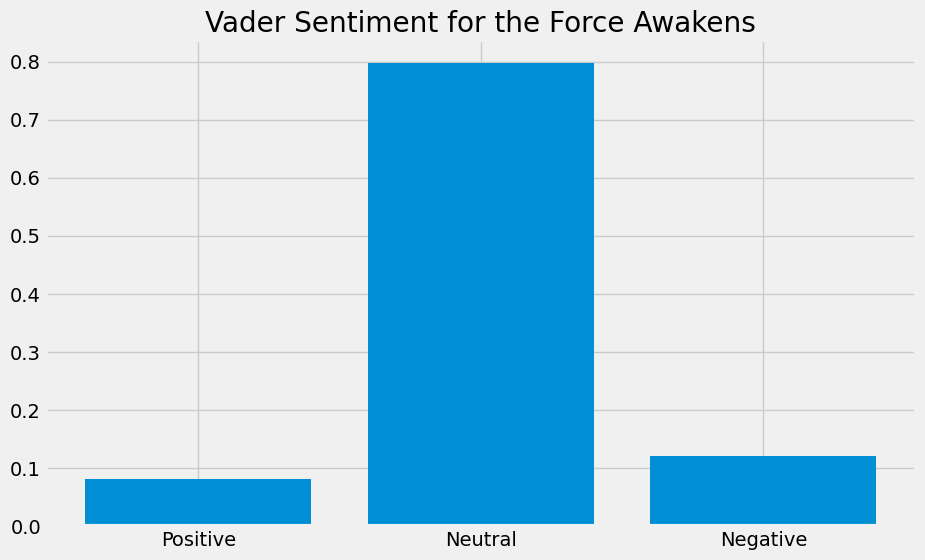

In [ ]:
plt.figure(figsize=(10, 6))
xlabels = ['Positive', 'Neutral', 'Negative']
plt.bar(xlabels, [episode7_score['pos'], episode7_score['neu'], episode7_score['neg']]) #labels
plt.title('Vader Sentiment for the Force Awakens') #title
plt.savefig("sequel-vader.pdf")
plt.show()

In [ ]:
print(episode7_score) #print the vader scores for the 7th episode
print(episode7_NRC.raw_emotion_scores) #print the raw emotional scores (count) for the 7th episode
print(episode7_NRC.affect_frequencies) #print the frequency of the emotions for the 7th episode


{'neg': 0.12, 'neu': 0.797, 'pos': 0.082, 'compound': -1.0}
{'anticipation': 486, 'joy': 302, 'positive': 868, 'trust': 702, 'anger': 604, 'fear': 738, 'negative': 1051, 'sadness': 441, 'surprise': 335, 'disgust': 265}
{'fear': 0.1274171270718232, 'anger': 0.1042817679558011, 'anticip': 0.0, 'trust': 0.12120165745856354, 'surprise': 0.05783839779005525, 'positive': 0.14986187845303867, 'negative': 0.181457182320442, 'sadness': 0.07613950276243094, 'disgust': 0.045752762430939224, 'joy': 0.05214088397790055, 'anticipation': 0.08390883977900553}


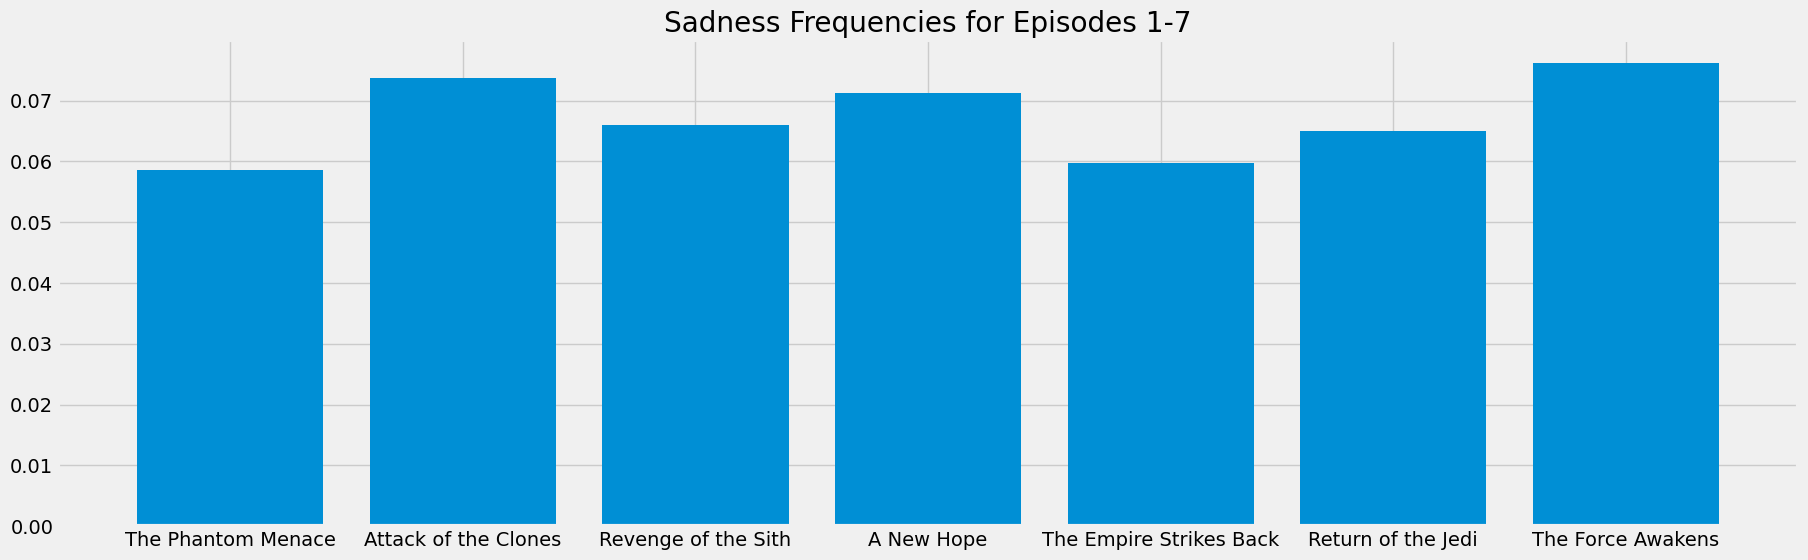

In [ ]:
#creating a bar plot of the episodes for the sadness emotion
plt.figure(figsize=(20, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith', 'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Force Awakens']
plt.bar(xlabels, [episode1_NRC.affect_frequencies['sadness'], episode2_NRC.affect_frequencies['sadness'], episode3_NRC.affect_frequencies['sadness'],episode4_NRC.affect_frequencies['sadness'],episode5_NRC.affect_frequencies['sadness'],episode6_NRC.affect_frequencies['sadness'],episode7_NRC.affect_frequencies['sadness']])
plt.title('Sadness Frequencies for Episodes 1-7')
plt.savefig("sad.pdf")
plt.show()

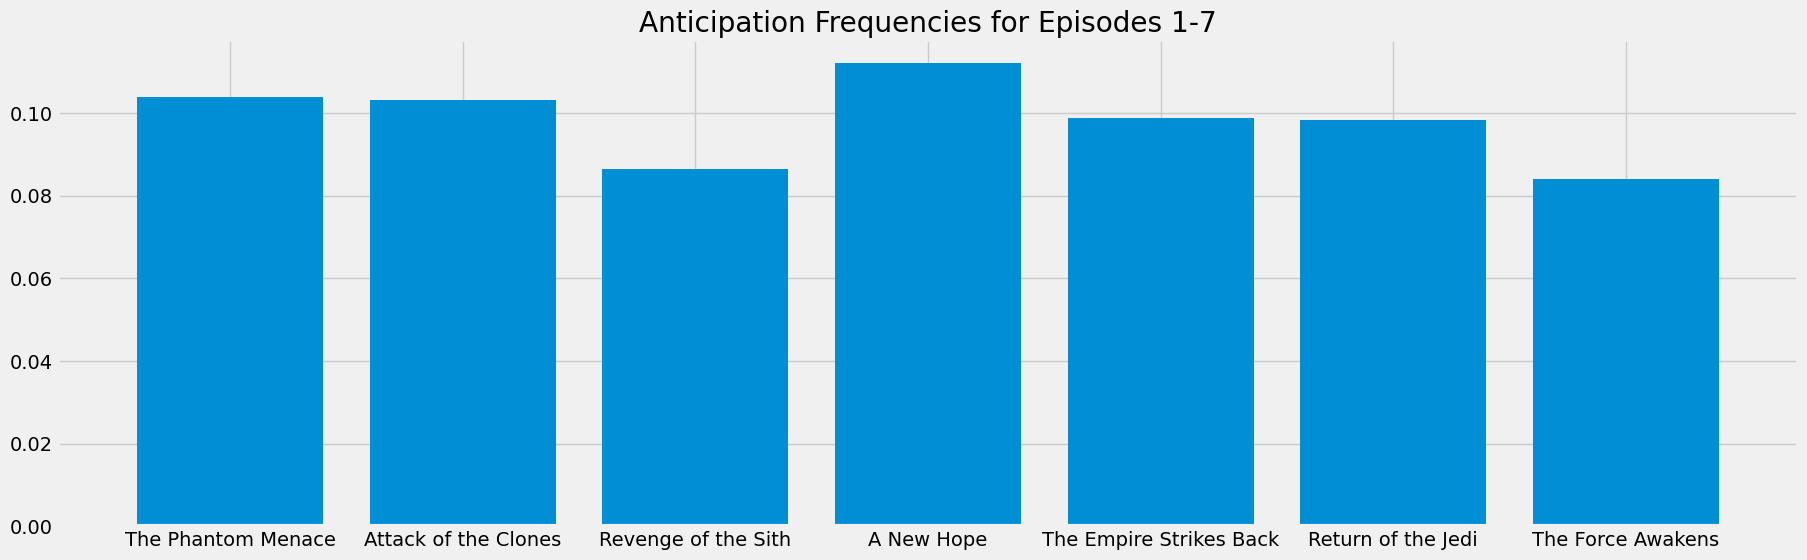

In [ ]:
#creating a bar plot of the episodes for the anticipaion emotion
plt.figure(figsize=(20, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith', 'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Force Awakens']
plt.bar(xlabels, [episode1_NRC.affect_frequencies['anticipation'], episode2_NRC.affect_frequencies['anticipation'], episode3_NRC.affect_frequencies['anticipation'],episode4_NRC.affect_frequencies['anticipation'],episode5_NRC.affect_frequencies['anticipation'],episode6_NRC.affect_frequencies['anticipation'],episode7_NRC.affect_frequencies['anticipation']])
plt.title('Anticipation Frequencies for Episodes 1-7')
plt.savefig("anticip.pdf")
plt.show()

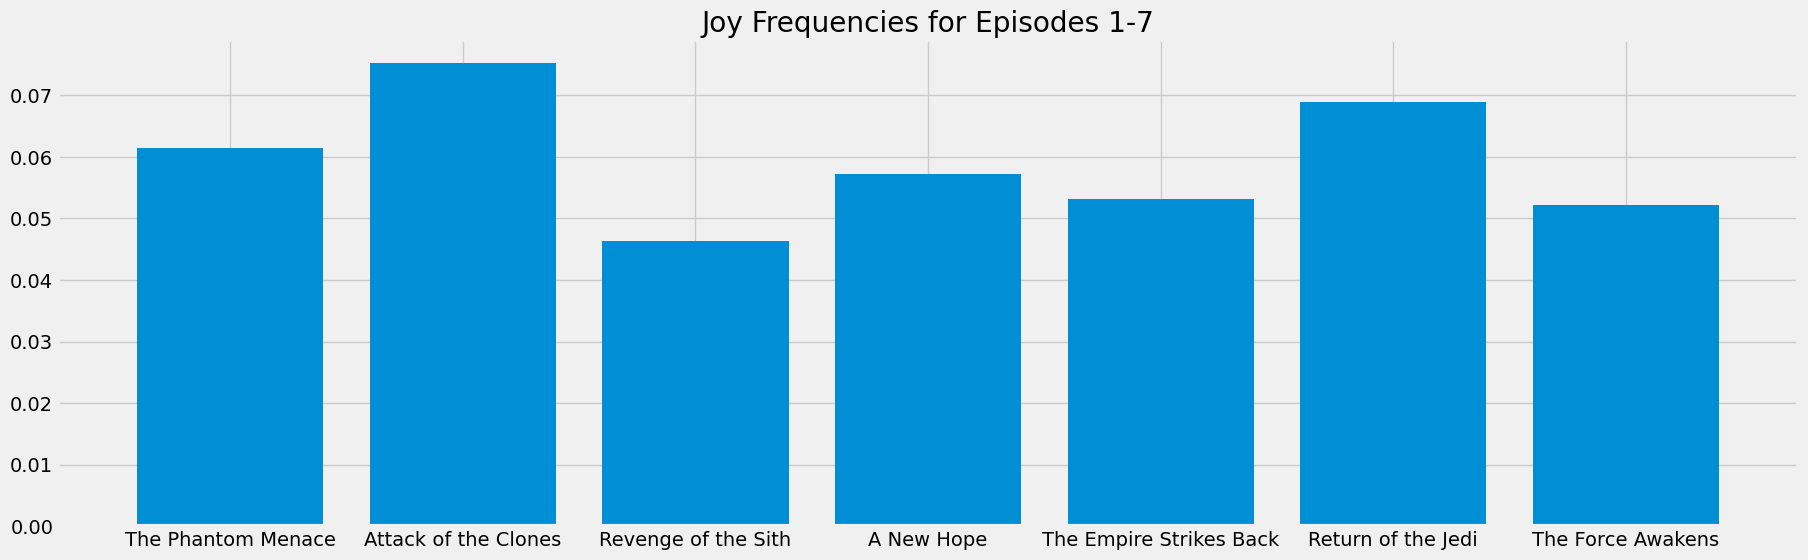

In [ ]:
#creating a bar plot of the episodes for the joy emotion
plt.figure(figsize=(20, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith', 'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Force Awakens']
plt.bar(xlabels, [episode1_NRC.affect_frequencies['joy'], episode2_NRC.affect_frequencies['joy'], episode3_NRC.affect_frequencies['joy'],episode4_NRC.affect_frequencies['joy'],episode5_NRC.affect_frequencies['joy'],episode6_NRC.affect_frequencies['joy'],episode7_NRC.affect_frequencies['joy']])
plt.title('Joy Frequencies for Episodes 1-7')
plt.savefig("joy.pdf")
plt.show()

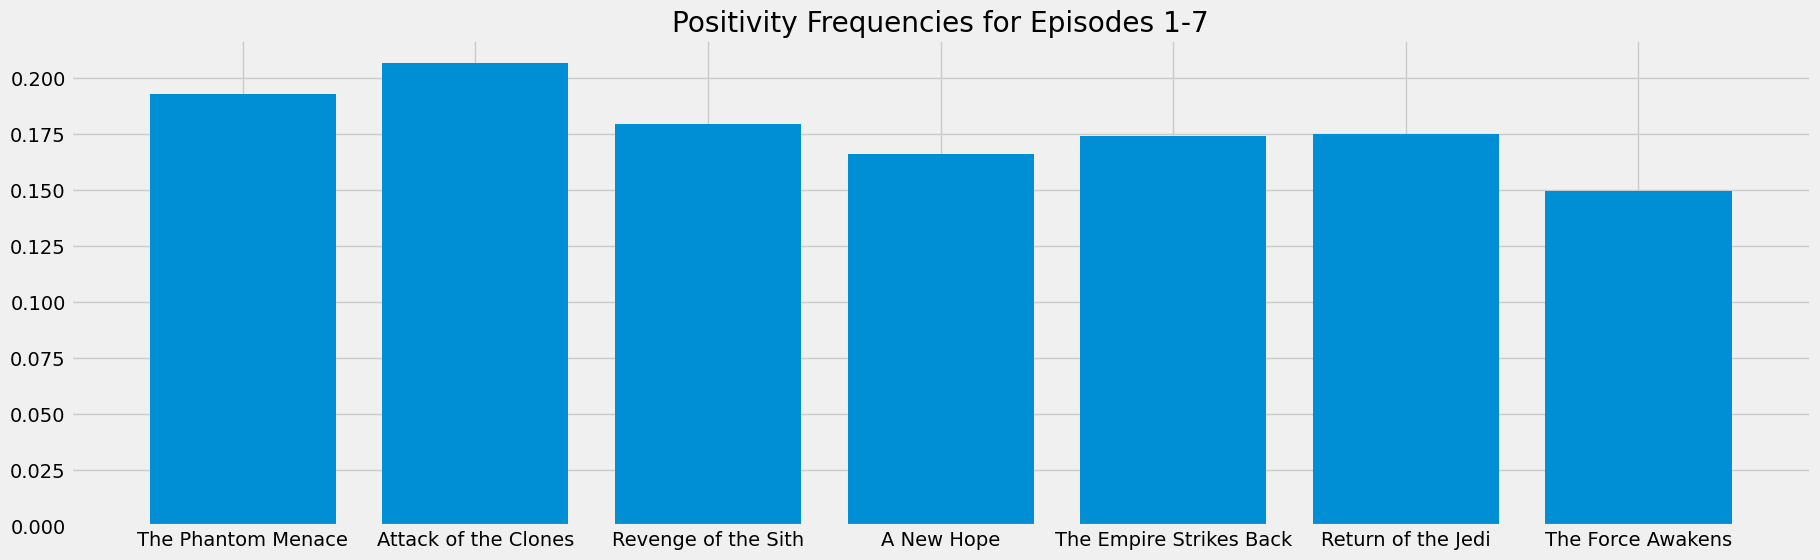

In [ ]:
#creating a bar plot of the episodes for the positvity emotion
plt.figure(figsize=(20, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith', 'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Force Awakens']
plt.bar(xlabels, [episode1_NRC.affect_frequencies['positive'], episode2_NRC.affect_frequencies['positive'], episode3_NRC.affect_frequencies['positive'],episode4_NRC.affect_frequencies['positive'],episode5_NRC.affect_frequencies['positive'],episode6_NRC.affect_frequencies['positive'],episode7_NRC.affect_frequencies['positive']])
plt.title('Positivity Frequencies for Episodes 1-7')
plt.savefig("pos.pdf")
plt.show()

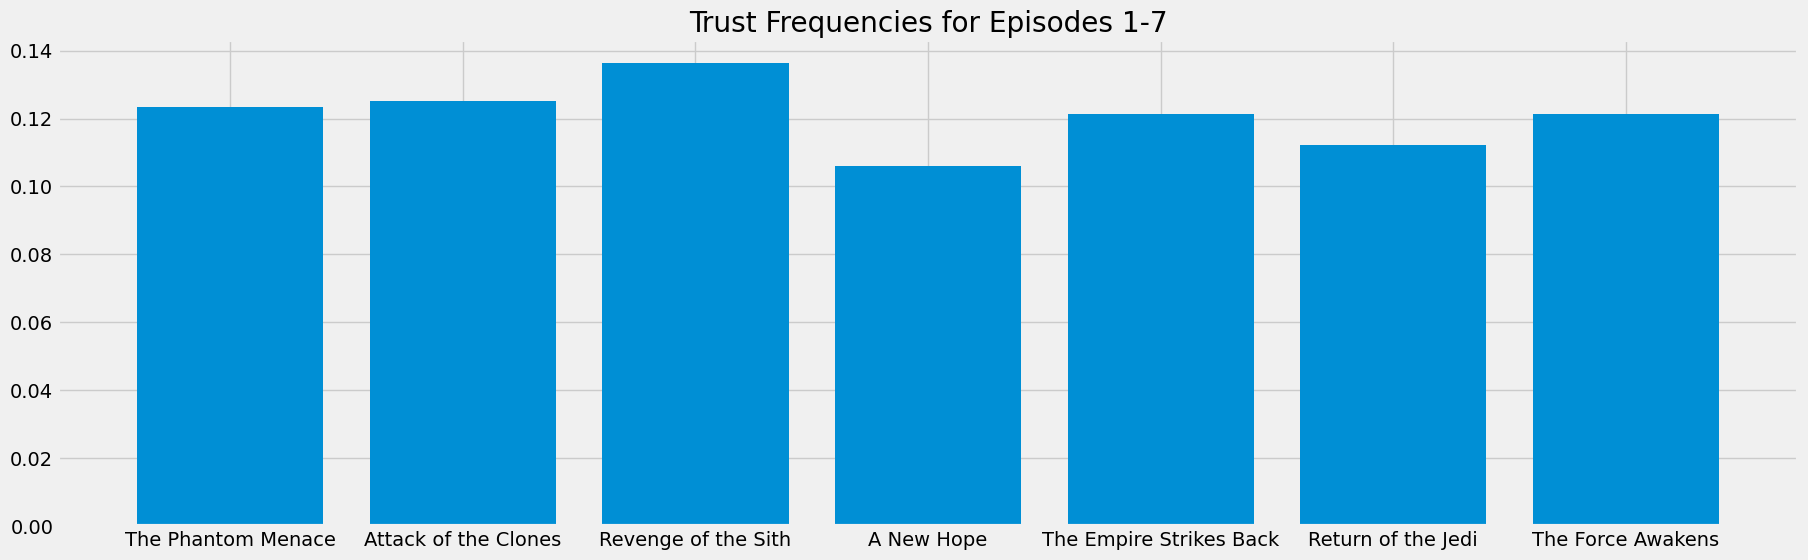

In [ ]:
#creating a bar plot of the episodes for the trust emotion
plt.figure(figsize=(20, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith', 'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Force Awakens']
plt.bar(xlabels, [episode1_NRC.affect_frequencies['trust'], episode2_NRC.affect_frequencies['trust'], episode3_NRC.affect_frequencies['trust'],episode4_NRC.affect_frequencies['trust'],episode5_NRC.affect_frequencies['trust'],episode6_NRC.affect_frequencies['trust'],episode7_NRC.affect_frequencies['trust']])
plt.title('Trust Frequencies for Episodes 1-7')
plt.savefig("trust.pdf")
plt.show()

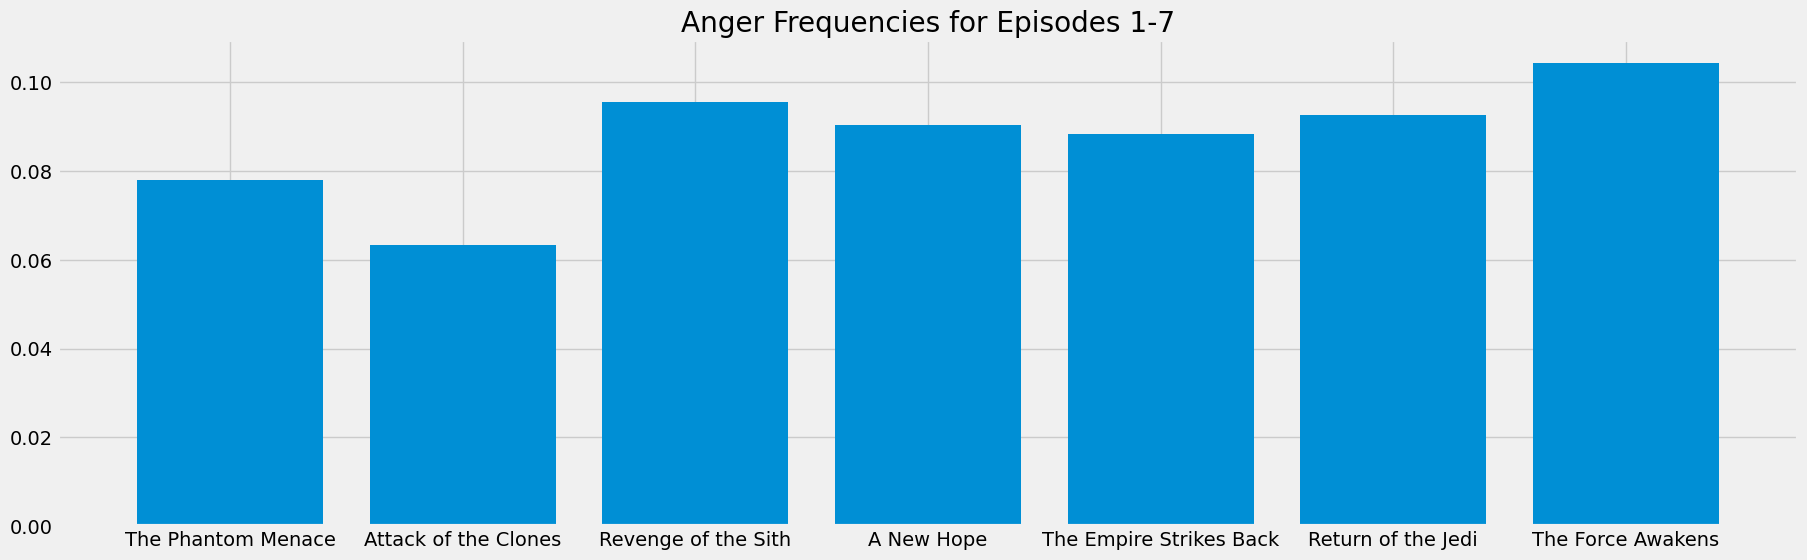

In [ ]:
#creating a bar plot of the episodes for the anger emotion
plt.figure(figsize=(20, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith', 'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Force Awakens']
plt.bar(xlabels, [episode1_NRC.affect_frequencies['anger'], episode2_NRC.affect_frequencies['anger'], episode3_NRC.affect_frequencies['anger'],episode4_NRC.affect_frequencies['anger'],episode5_NRC.affect_frequencies['anger'],episode6_NRC.affect_frequencies['anger'],episode7_NRC.affect_frequencies['anger']])
plt.title('Anger Frequencies for Episodes 1-7')
plt.savefig("anger.pdf")
plt.show()

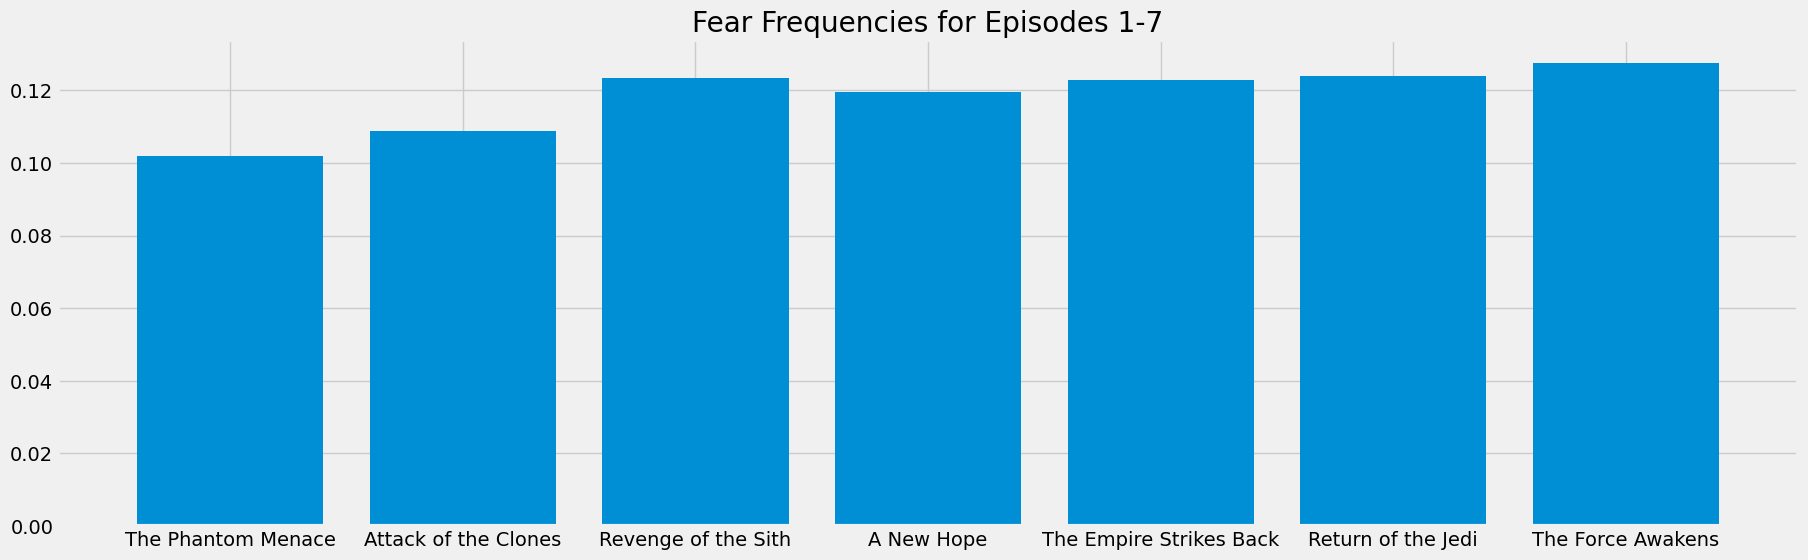

In [ ]:
#creating a bar plot of the episodes for the fear emotion
plt.figure(figsize=(20, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith', 'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Force Awakens']
plt.bar(xlabels, [episode1_NRC.affect_frequencies['fear'], episode2_NRC.affect_frequencies['fear'], episode3_NRC.affect_frequencies['fear'],episode4_NRC.affect_frequencies['fear'],episode5_NRC.affect_frequencies['fear'],episode6_NRC.affect_frequencies['fear'],episode7_NRC.affect_frequencies['fear']])
plt.title('Fear Frequencies for Episodes 1-7')
plt.savefig("fear.pdf")
plt.show()

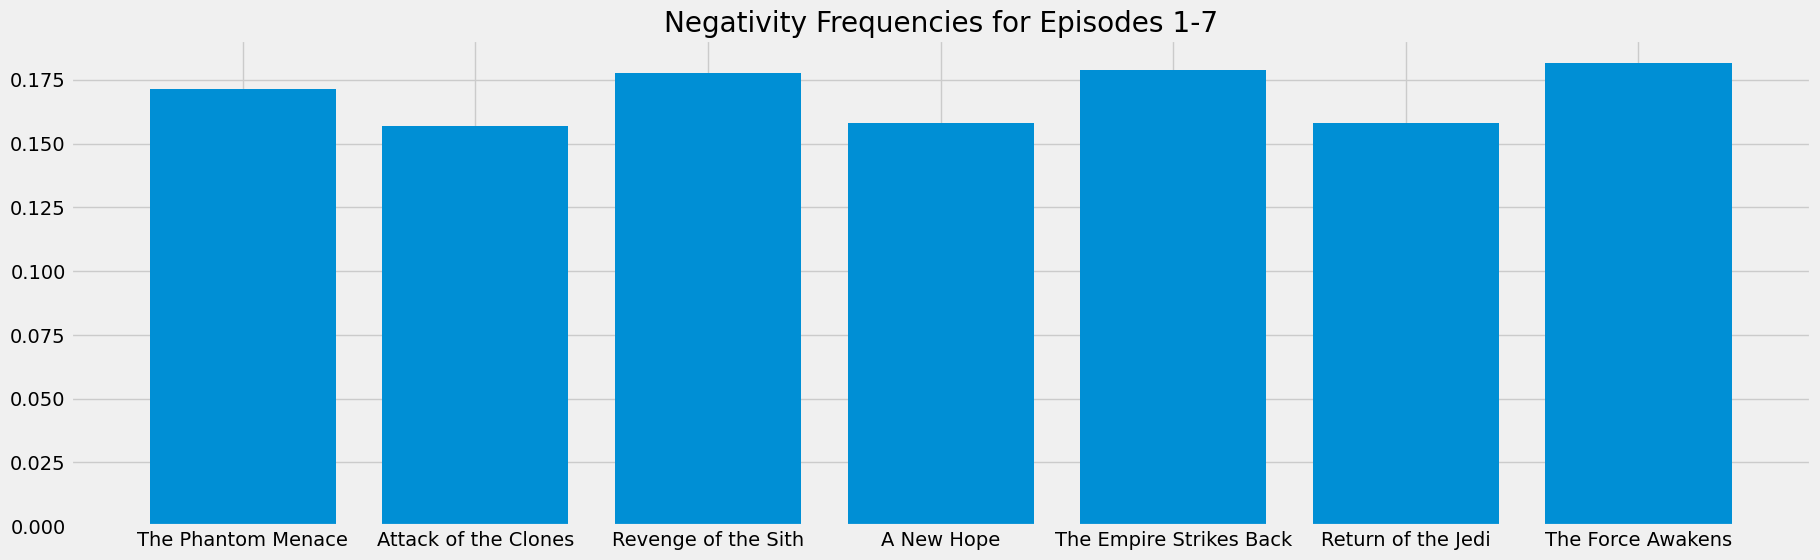

In [ ]:
#creating a bar plot of the episodes for the negative emotion
plt.figure(figsize=(20, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith', 'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Force Awakens']
plt.bar(xlabels, [episode1_NRC.affect_frequencies['negative'], episode2_NRC.affect_frequencies['negative'], episode3_NRC.affect_frequencies['negative'],episode4_NRC.affect_frequencies['negative'],episode5_NRC.affect_frequencies['negative'],episode6_NRC.affect_frequencies['negative'],episode7_NRC.affect_frequencies['negative']])
plt.title('Negativity Frequencies for Episodes 1-7')
plt.savefig("neg.pdf")
plt.show()

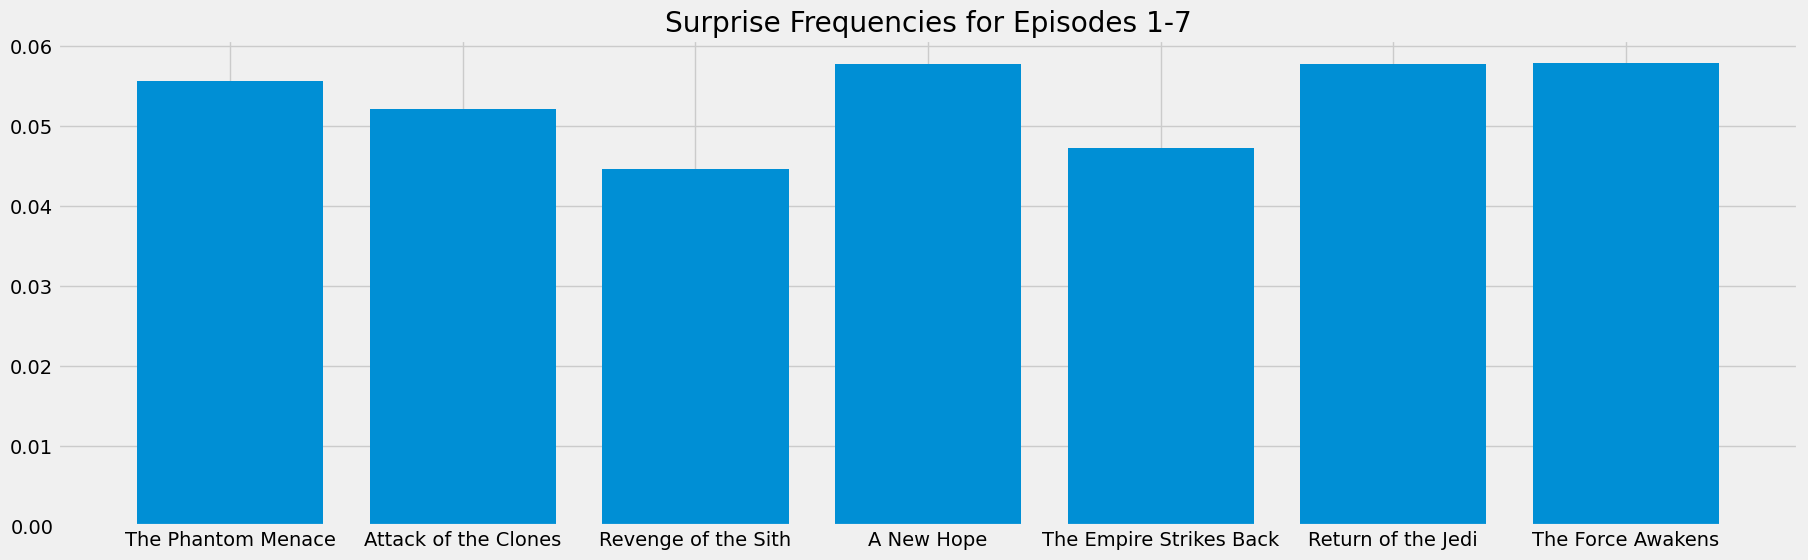

In [ ]:
#creating a bar plot of the episodes for the surprise emotion
plt.figure(figsize=(20, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith', 'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Force Awakens']
plt.bar(xlabels, [episode1_NRC.affect_frequencies['surprise'], episode2_NRC.affect_frequencies['surprise'], episode3_NRC.affect_frequencies['surprise'],episode4_NRC.affect_frequencies['surprise'],episode5_NRC.affect_frequencies['surprise'],episode6_NRC.affect_frequencies['surprise'],episode7_NRC.affect_frequencies['surprise']])
plt.title('Surprise Frequencies for Episodes 1-7')
plt.savefig("surp.pdf")
plt.show()

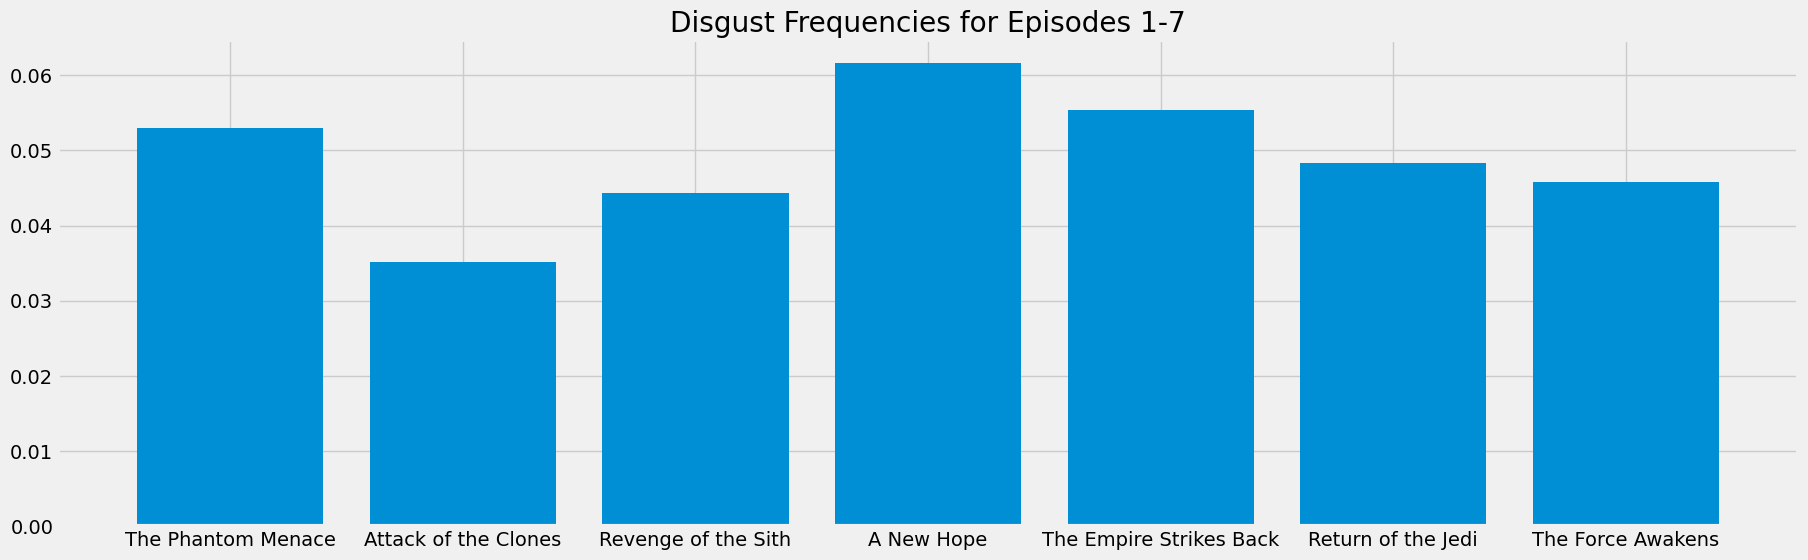

In [ ]:
#creating a bar plot of the episodes for the disgust emotion
plt.figure(figsize=(20, 6))
xlabels = ['The Phantom Menace', 'Attack of the Clones', 'Revenge of the Sith', 'A New Hope', 'The Empire Strikes Back', 'Return of the Jedi', 'The Force Awakens']
plt.bar(xlabels, [episode1_NRC.affect_frequencies['disgust'], episode2_NRC.affect_frequencies['disgust'], episode3_NRC.affect_frequencies['disgust'],episode4_NRC.affect_frequencies['disgust'],episode5_NRC.affect_frequencies['disgust'],episode6_NRC.affect_frequencies['disgust'],episode7_NRC.affect_frequencies['disgust']])
plt.title('Disgust Frequencies for Episodes 1-7')
plt.savefig("disgust.pdf")
plt.show()

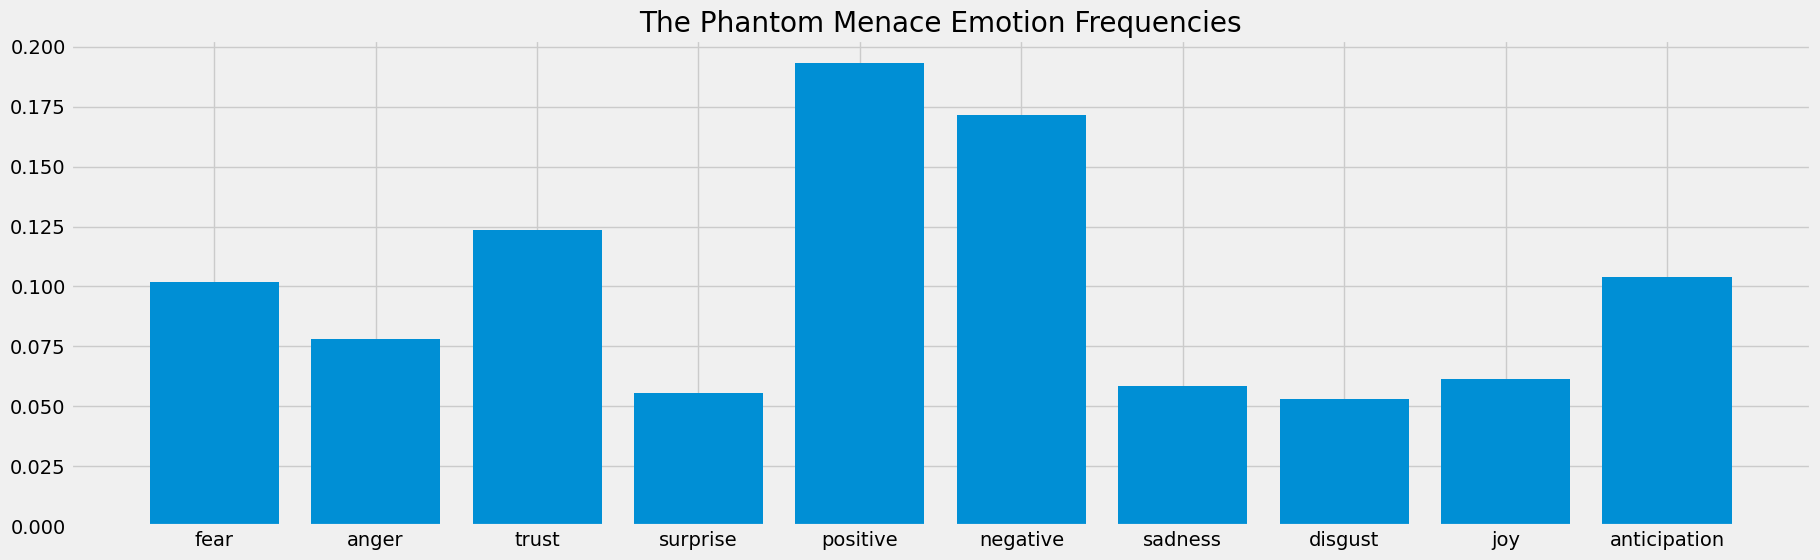

In [ ]:
#creating a bar plot for the emotion frequencies in the phantom menace
key_to_exclude = 'anticip'

# Filter out the key
filtered_data1 = {k: v for k, v in episode1_NRC.affect_frequencies.items() if k != key_to_exclude}

plt.figure(figsize=(20, 6))
plt.bar(list(filtered_data1.keys()), list(filtered_data1.values()))
plt.title('The Phantom Menace Emotion Frequencies')
plt.savefig("ep1.pdf")
plt.show()

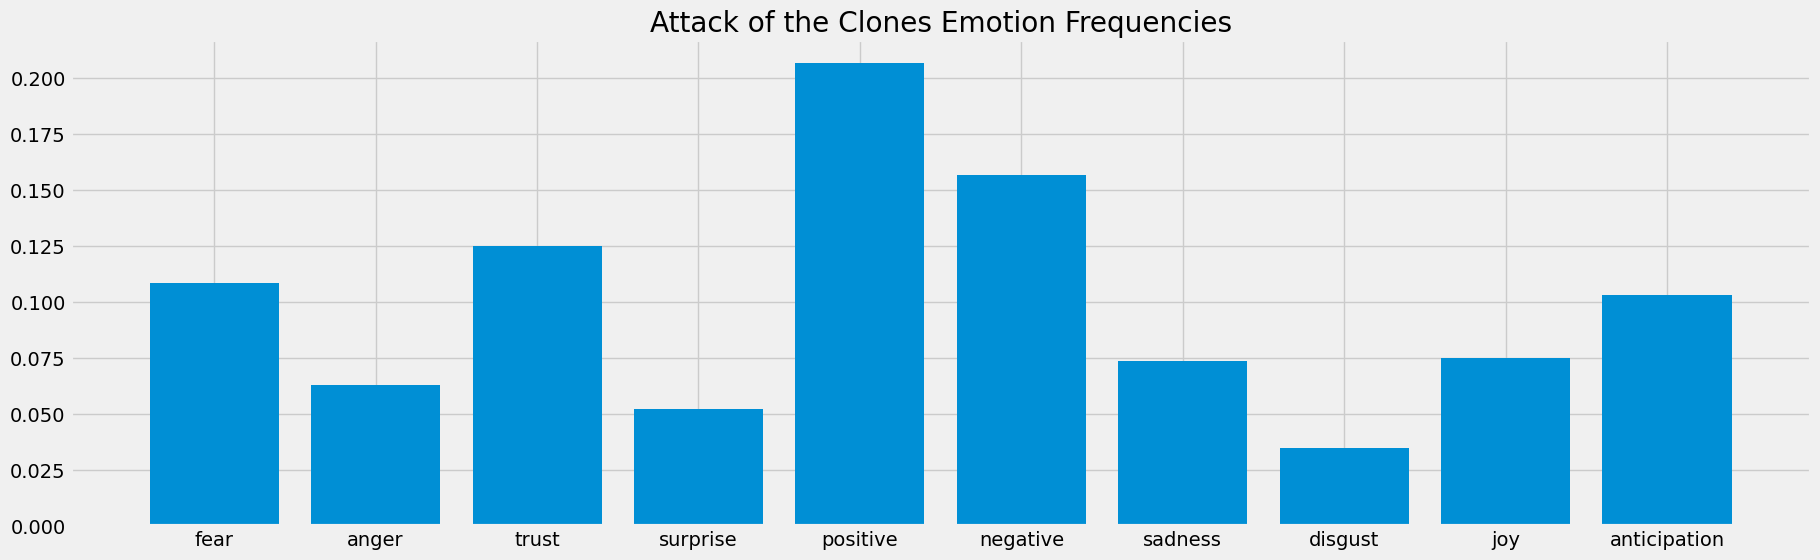

In [ ]:
#creating a bar plot for the emotion frequencies in the attack of the clones
filtered_data2 = {k: v for k, v in episode2_NRC.affect_frequencies.items() if k != key_to_exclude}

plt.figure(figsize=(20, 6))
plt.bar(list(filtered_data2.keys()), list(filtered_data2.values()))
plt.title('Attack of the Clones Emotion Frequencies')
plt.savefig("ep2.pdf")
plt.show()

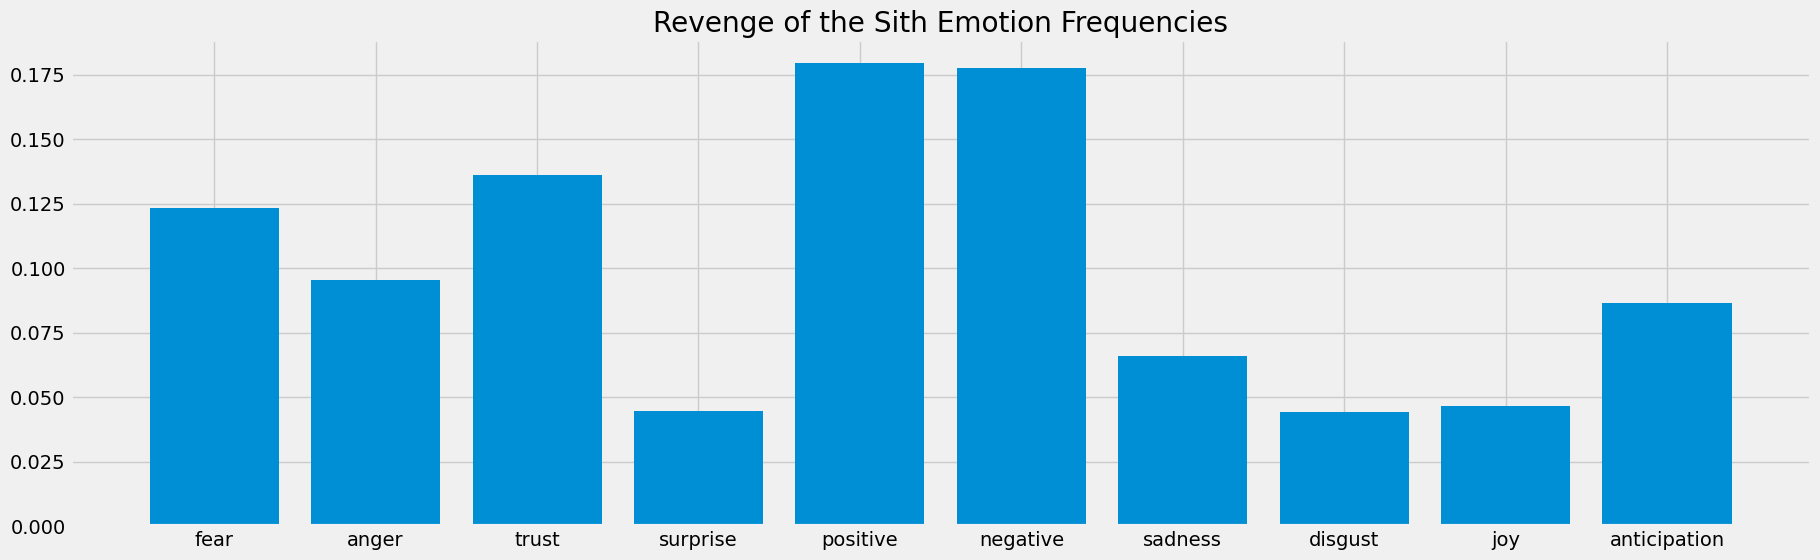

In [ ]:
#creating a bar plot for the emotion frequencies in the revenge of the sith
filtered_data3 = {k: v for k, v in episode3_NRC.affect_frequencies.items() if k != key_to_exclude}

plt.figure(figsize=(20, 6))
plt.bar(list(filtered_data3.keys()), list(filtered_data3.values()))
plt.title('Revenge of the Sith Emotion Frequencies')
plt.savefig("ep3.pdf")
plt.show()

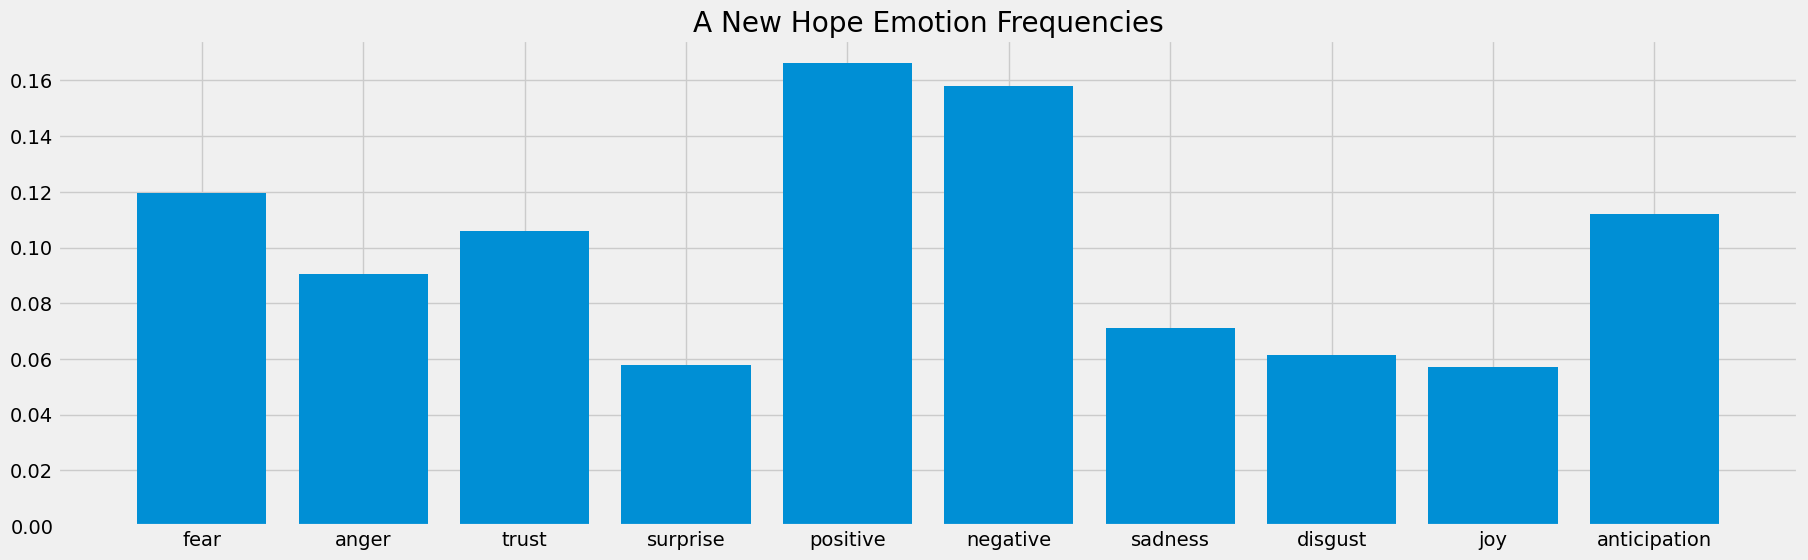

In [ ]:
#creating a bar plot for the emotion frequencies in the a new hope emotion
filtered_data4 = {k: v for k, v in episode4_NRC.affect_frequencies.items() if k != key_to_exclude}

plt.figure(figsize=(20, 6))
plt.bar(list(filtered_data4.keys()), list(filtered_data4.values()))
plt.title('A New Hope Emotion Frequencies')
plt.savefig("ep4.pdf")
plt.show()

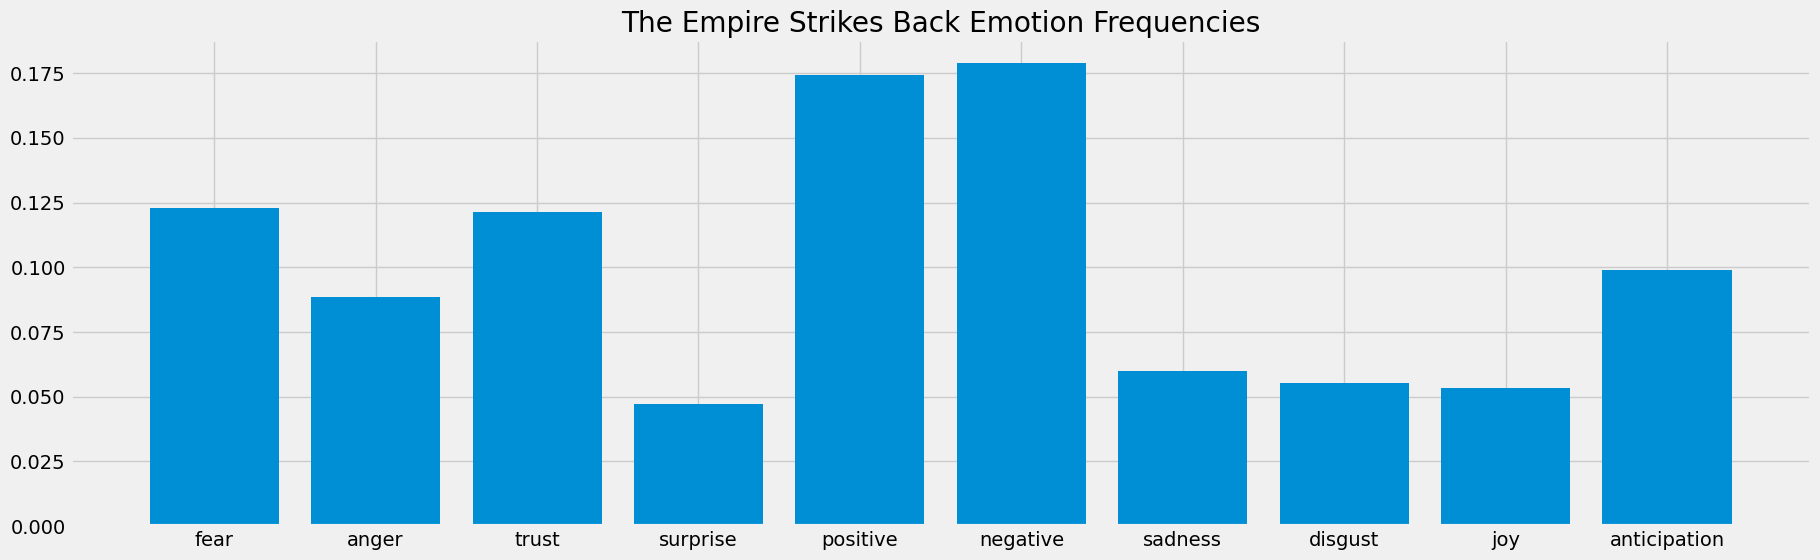

In [ ]:
#creating a bar plot for the emotion frequencies in the empire strikes back
filtered_data5 = {k: v for k, v in episode5_NRC.affect_frequencies.items() if k != key_to_exclude}

plt.figure(figsize=(20, 6))
plt.bar(list(filtered_data5.keys()), list(filtered_data5.values()))
plt.title('The Empire Strikes Back Emotion Frequencies')
plt.savefig("ep5.pdf")
plt.show()

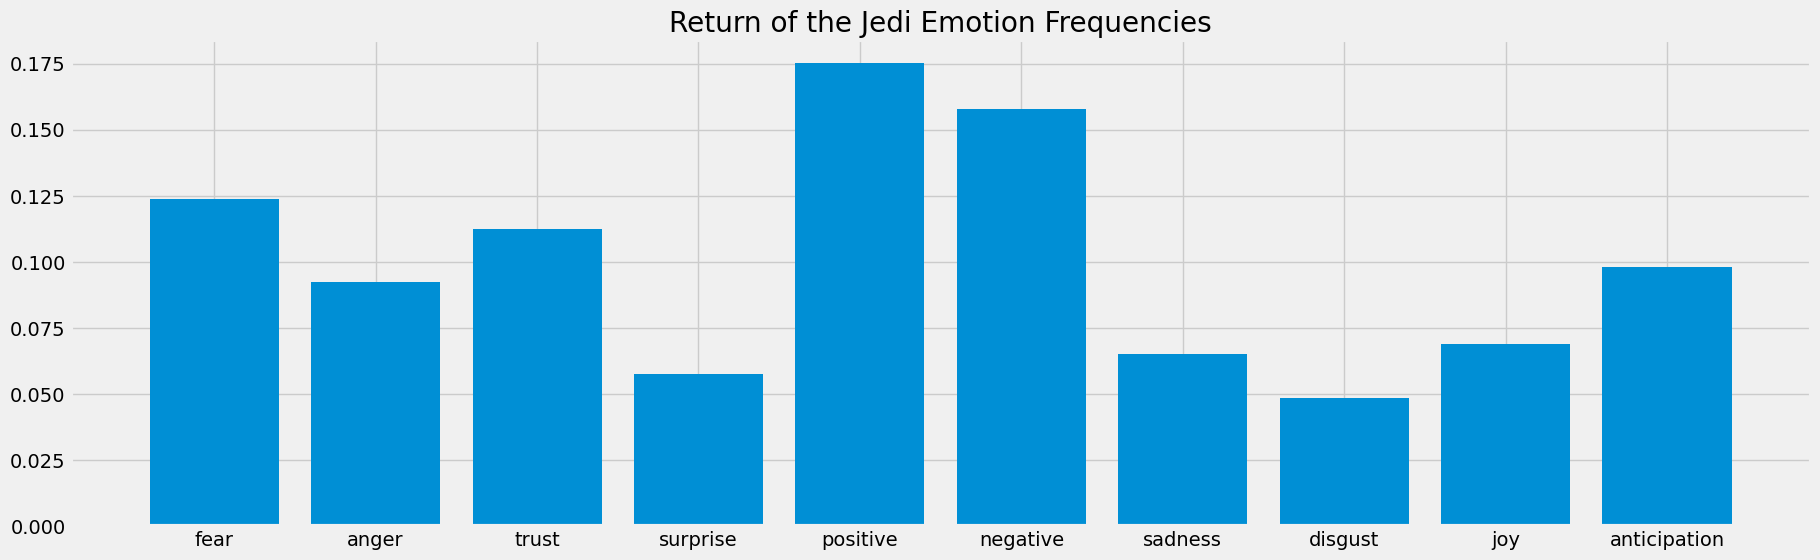

In [ ]:
#creating a bar plot for the emotion frequencies in the return of the jedi
filtered_data6 = {k: v for k, v in episode6_NRC.affect_frequencies.items() if k != key_to_exclude}

plt.figure(figsize=(20, 6))
plt.bar(list(filtered_data6.keys()), list(filtered_data6.values()))
plt.title('Return of the Jedi Emotion Frequencies')
plt.savefig("ep6.pdf")
plt.show()

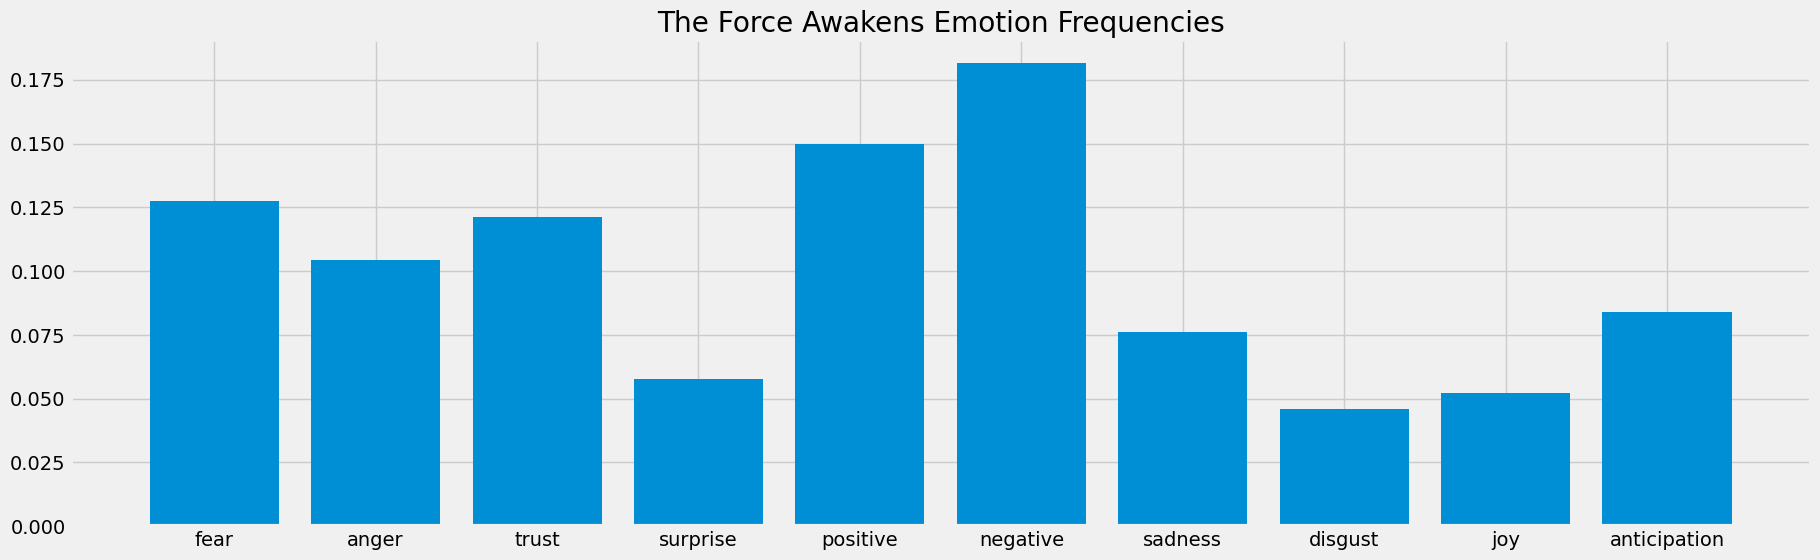

In [ ]:
#creating a bar plot for the emotion frequencies in the force awakens emotion
filtered_data7 = {k: v for k, v in episode7_NRC.affect_frequencies.items() if k != key_to_exclude}

plt.figure(figsize=(20, 6))
plt.bar(list(filtered_data7.keys()), list(filtered_data7.values()))
plt.title('The Force Awakens Emotion Frequencies')
plt.savefig("ep7.pdf")
plt.show()